In [24]:
import utlis

import numpy as np
import matplotlib.pyplot as plt

In [3]:
print("Hello")

Hello


In [17]:
# Step(1) Generate Binary Source 
# 0s and 1s with equal Probabilities 0.5
nums = np.random.choice([0, 1], size=1000, p=[.5,.5])

515


In [21]:
def p(t):
    """Basic rectangular pulse"""
    return 1 * (abs(t) < 1)

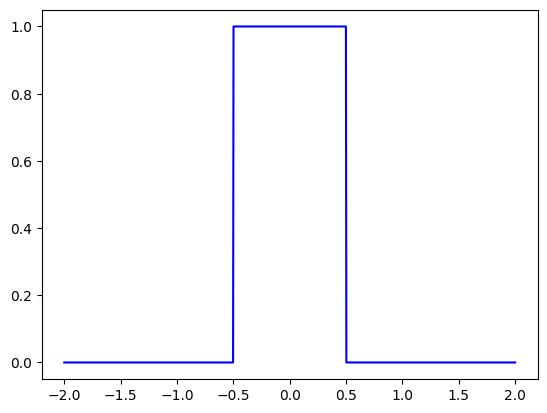

In [25]:
t = np.linspace(-2, 2, 1000)

plt.plot(t, p(t), '-b')